Começamos importanto as bibliotecas necessarias.
Neste caso, apenas matplotlib para plotagem gráfica

In [5]:
import matplotlib.pyplot as plt  # Biblioteca para plotagem
import random

Agora suponha que foi realizado um experimento, e foram amostrados
valores y_i em diferentes instantes x_i, formando pares de (x_i,y_i)

In [6]:
pares_xy = [
    # (x_i, y_i),
    (3,   1),
    (21, 10),
    (22, 14),
    (34, 34),
    (54, 44),
    (34, 36),
    (55, 22),
    (67, 67),
    (89, 79),
    (99, 90)
    ]

Para simplificar as plotagens, podemos agrupar os valores de x e y separadamente

Text(0, 0.5, 'Valores Y')

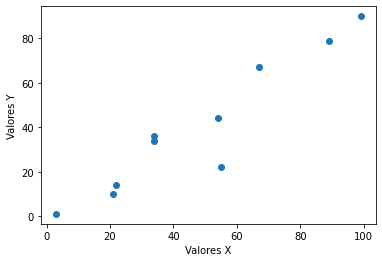

In [7]:
# Separa os x e os y em listas diferentes
x = [par[0] for par in pares_xy]
y = [par[1] for par in pares_xy]

plt.scatter(x, y)
plt.xlabel("Valores X")
plt.ylabel("Valores Y")

Visualmente, a função y(x) se assemelha a uma função linear descrita por y(x) = a*x + b

In [8]:
def funcao_linear(a, b, x):
    return a*x + b

Para descobrirmos a melhor aproximação de 'a' e 'b', precisamos de uma métrica de proximidade.
Uma das possíveis métricas é o método dos mínimos quadrados

In [9]:
def residuo_metodo_minimos_quadrados(y_medido, y_aproximado):
    residuo = 0
    for i in range(len(y_medido)):
        residuo += (y_medido[i]-y_aproximado[i])**2
    return residuo

Agora podemos testar iterativamente diferentes valores de 'a' e 'b', afim de minimizar o resíduo (loss) acima

Iteração 0: a=0.325, b=0.881, residuo 9407.8
Iteração 1: a=0.341, b=0.881, residuo 8884.8
Iteração 2: a=0.357, b=0.881, residuo 8394.2
Iteração 3: a=0.372, b=0.881, residuo 7933.8
Iteração 4: a=0.387, b=0.881, residuo 7502.0
Iteração 5: a=0.401, b=0.882, residuo 7096.8
Iteração 6: a=0.415, b=0.882, residuo 6716.7
Iteração 7: a=0.429, b=0.882, residuo 6360.0
Iteração 8: a=0.442, b=0.882, residuo 6025.5
Iteração 9: a=0.454, b=0.882, residuo 5711.6
Iteração 10: a=0.467, b=0.883, residuo 5417.1
Iteração 11: a=0.478, b=0.883, residuo 5140.8
Iteração 12: a=0.490, b=0.883, residuo 4881.6
Iteração 13: a=0.501, b=0.883, residuo 4638.4
Iteração 14: a=0.512, b=0.883, residuo 4410.3
Iteração 15: a=0.522, b=0.883, residuo 4196.3
Iteração 16: a=0.532, b=0.883, residuo 3995.5
Iteração 17: a=0.542, b=0.884, residuo 3807.1
Iteração 18: a=0.552, b=0.884, residuo 3630.3
Iteração 19: a=0.561, b=0.884, residuo 3464.5
Iteração 20: a=0.570, b=0.884, residuo 3309.0
Iteração 21: a=0.578, b=0.884, residuo 3163.

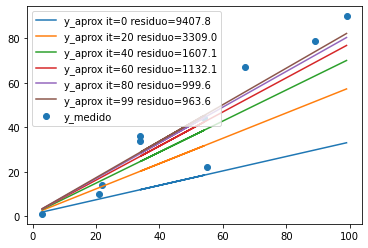

In [10]:
def gera_y_aproximado(a,b,x_medido):
    numeros = len(x_medido)
    y_aproximado = []
    # Para cada x_i, gera o valor aproximado de y_i(x_i) = a*x_i + b
    for i in range(numeros):
        y_aproximado.append(funcao_linear(a,b,x_medido[i]))
    return y_aproximado

def iteracao(a, b, x_medido, y_medido, taxa_aprendizagem, metodo="BGD"):

    if metodo == "BGD": # Batch Gradient Descent
        numeros = len(y_medido)
    elif metodo == "SGD": # Stochastic Gradient Descent
        numeros = 1
        indice = random.randint(0, len(y_medido)-1)
        x_medido = [x_medido[indice]]
        y_medido = [y_medido[indice]]
        print("i=", indice, "; x[i]=", x_medido)
    elif metodo == "MBGD":
        numeros = 5
        indices = set()
        while len(indices) < numeros:
            indices.add(random.randint(0, len(y_medido)-1))
        x_medido = [x_medido[indice] for indice in indices]
        y_medido = [y_medido[indice] for indice in indices]
        print("i's=", indices, "; x[i]=", x_medido)
    y_aproximado = gera_y_aproximado(a,b,x_medido)

    # Calcula o ajuste (gradiente) para parâmetros 'a' e 'b'
    residuo_a = sum([(y_aproximado[i]-y_medido[i])*x_medido[i] for i in range(numeros)])/numeros
    residuo_b = sum([(y_aproximado[i]-y_medido[i]) for i in range(numeros)])/numeros

    # Retorna os valores de 'a' e 'b' ajustados
    a = a - taxa_aprendizagem*residuo_a
    b = b - taxa_aprendizagem*residuo_b

    return a,b

def minimizacao_residuo(x_medido, y_medido, taxa_aprendizagem, iteracoes=100, metodo="BGD", print_it=False):
    # Escolhemos 'a' e 'b' iniciais aleatoriamente
    import random
    a = random.random()
    b = random.random()

    # Depois executamos uma série de iterações,
    # ajustando os valores de 'a' e 'b' progressivamente
    for it in range(iteracoes):
        a, b = iteracao(a,b,x_medido,y_medido,taxa_aprendizagem, metodo)

        y_aproximado = gera_y_aproximado(a,b,x_medido)
        residuo = residuo_metodo_minimos_quadrados(y_medido, y_aproximado)
        if print_it:
            print("Iteração %d: a=%.3f, b=%.3f, residuo %.1f" % (it, a, b, residuo))

        if it % int(iteracoes/5) == 0 or it == (iteracoes-1):
            plt.plot(x_medido, y_aproximado, label="y_aprox it=%d residuo=%.1f" % (it, residuo))

    plt.scatter(x_medido, y_medido, label="y_medido")
    plt.legend()

minimizacao_residuo(x,y, 1e-5, iteracoes=100, print_it=True)

E o que acontece se fizermos um ajuste mais fino? Ou seja, com menor taxa de aprendizagem?
Precisaremos de mais iterações para convergir para o resultado final, porém conseguimos valores mais precisos.

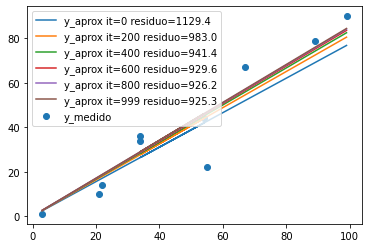

In [18]:
minimizacao_residuo(x,y, 1e-6, iteracoes=1000)

E se quisermos acelerar o processo aumentando a taxa de aprendizado?
O ajuste pode ser grande demais, fazendo com que a busca da melhor aproximação divirja, se afaste, do resultado desejado.

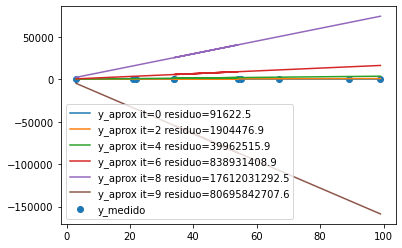

In [16]:
minimizacao_residuo(x, y, 1e-3, iteracoes=10)

Também podemos fazer o ajuste utilizando menos elementos por iteração.
No MBGD utilizando um mini-batch (neste caso 5 elementos do batch completo, que tem 10 elementos)

i's= {0, 3, 6, 7, 8} ; x[i]= [3, 34, 55, 67, 89]
Iteração 0: a=0.897, b=0.589, residuo 1014.7
i's= {0, 2, 4, 5, 8} ; x[i]= [3, 22, 54, 34, 89]
Iteração 1: a=0.893, b=0.589, residuo 1003.5
i's= {1, 2, 5, 7, 9} ; x[i]= [21, 22, 34, 67, 99]
Iteração 2: a=0.897, b=0.589, residuo 1014.4
i's= {0, 5, 6, 7, 8} ; x[i]= [3, 34, 55, 67, 89]
Iteração 3: a=0.886, b=0.589, residuo 984.9
i's= {1, 4, 5, 7, 8} ; x[i]= [21, 54, 34, 67, 89]
Iteração 4: a=0.888, b=0.589, residuo 989.1
i's= {0, 1, 5, 6, 8} ; x[i]= [3, 21, 34, 55, 89]
Iteração 5: a=0.872, b=0.588, residuo 957.4
i's= {0, 1, 2, 7, 8} ; x[i]= [3, 21, 22, 67, 89]
Iteração 6: a=0.875, b=0.588, residuo 961.9
i's= {0, 4, 6, 7, 9} ; x[i]= [3, 54, 55, 67, 99]
Iteração 7: a=0.866, b=0.588, residuo 949.5
i's= {3, 4, 5, 7, 8} ; x[i]= [34, 54, 34, 67, 89]
Iteração 8: a=0.875, b=0.588, residuo 961.0
i's= {0, 4, 5, 7, 8} ; x[i]= [3, 54, 34, 67, 89]
Iteração 9: a=0.880, b=0.588, residuo 971.1


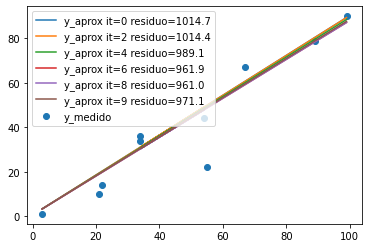

In [13]:
minimizacao_residuo(x,y, 5e-5, iteracoes=10, metodo="MBGD", print_it=True)

No SGD com apenas um elemento do batch escolhido aleatóriamente

i= 2 ; x[i]= [22]
Iteração 0: a=0.634, b=0.315, residuo 2424.4
i= 4 ; x[i]= [54]
Iteração 1: a=0.660, b=0.316, residuo 2096.3
i= 0 ; x[i]= [3]
Iteração 2: a=0.660, b=0.316, residuo 2098.7
i= 1 ; x[i]= [21]
Iteração 3: a=0.655, b=0.315, residuo 2152.3
i= 4 ; x[i]= [54]
Iteração 4: a=0.678, b=0.316, residuo 1890.6
i= 1 ; x[i]= [21]
Iteração 5: a=0.673, b=0.316, residuo 1943.8
i= 7 ; x[i]= [67]
Iteração 6: a=0.745, b=0.317, residuo 1292.4
i= 6 ; x[i]= [55]
Iteração 7: a=0.692, b=0.316, residuo 1738.4
i= 2 ; x[i]= [22]
Iteração 8: a=0.691, b=0.316, residuo 1755.6
i= 4 ; x[i]= [54]
Iteração 9: a=0.708, b=0.316, residuo 1589.2


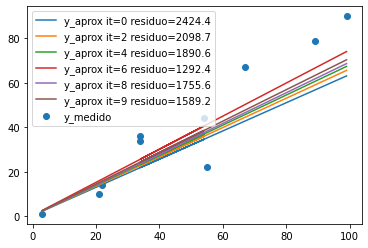

In [14]:
minimizacao_residuo(x,y, 5e-5, iteracoes=10, metodo="SGD", print_it=True)